# Major Project Submission

Kaggle User name: SN2

The Sequence of Code is: 

1.   Data Loading 
2.   CNN Model(Deep Learning) Implement

1.   HOG Features Included with CNN
2.   VM Model (Conv ML) on Public Dataset

1.   On Private Dataset( Running Best Implemented Model: CNN Model )














# 1. Loading Data

## Import and drive mount

In [3]:
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from google.colab import drive

drive.mount('/content/Mydrive/')



Mounted at /content/Mydrive/


## Variable and label definition

In [2]:
image_size = 100
#dataset_directory = '/content/Mydrive/MyDrive/Colab Notebooks/ML_Project_code/'  # change to your own directory
dataset_directory = '/content/Mydrive/MyDrive/ML_Project_code/data'
age_ranges = {
    (6,20) : 0, 
    (35,40) : 1, 
    (55,98) : 2
}

def convert_ranges(age):
  for key in age_ranges:
    if key[0] <= age <= key[1]:
      return age_ranges[key]


def transform_labels_age(labels_vec):
  new_labels_vec = []
  for x in labels_vec:
    x2 = x.split('-')
    new_labels_vec.append(convert_ranges(int(x2[1])))
  return np.array(new_labels_vec)

def transform_labels(labels_vec):
  return transform_labels_age(labels_vec)


In [4]:
!unzip dataset_directory # if the folder is zip only then

unzip:  cannot find or open dataset_directory, dataset_directory.zip or dataset_directory.ZIP.


## Data loading and rescaling

In [3]:
images_train = np.load(join(dataset_directory, 'train_images.npy'))
labels_train_full = np.load(join(dataset_directory, 'train_labels.npy'))
labels_train = transform_labels(labels_train_full)

images_val = np.load(join(dataset_directory, 'val_images.npy'))
labels_val_full = np.load(join(dataset_directory, 'val_labels.npy'))
labels_val = transform_labels(labels_val_full)

images_test_public = np.load(join(dataset_directory, 'test_images.npy'))

images_train = images_train.reshape([-1, image_size, image_size, 3]) / 255.0
images_val = images_val.reshape([-1, image_size, image_size, 3]) / 255.0
images_test_public = images_test_public.reshape([-1, image_size, image_size, 3]) / 255.0

print(images_train.shape)
print(images_val.shape)
print(images_test_public.shape)

print(labels_val_full[:9])
print(labels_val[:9])


(13475, 100, 100, 3)
(2595, 100, 100, 3)
(2374, 100, 100, 3)
['12626-16' '12726-37' '12726-37' '12726-37' '12726-37' '12726-37'
 '12726-37' '12726-39' '12726-37']
[0 1 1 1 1 1 1 1 1]


## Visualising sample images

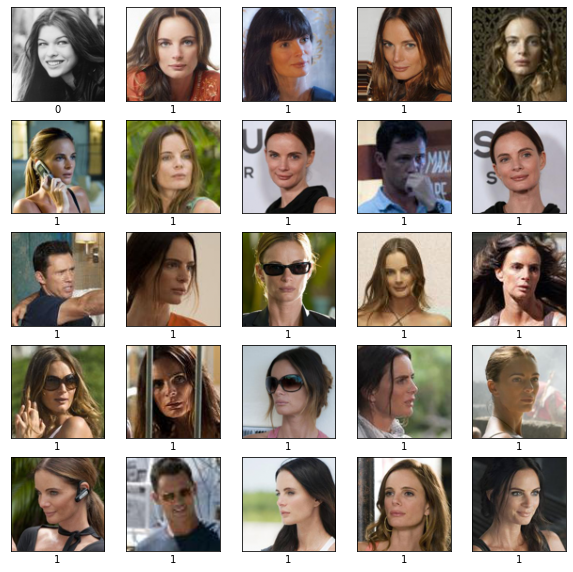

In [6]:
plt.figure(figsize=(10,10))
offset = 0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_val[i+offset], cmap=plt.cm.binary)
    plt.xlabel(labels_val[i+offset])
plt.show()

Reason of choosing CNN model for final image classification is, it performs the best accuracy result in compare to the other models.

# CNN model(Deep learning)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Public Image Data Preprocessing: Image Data Augmentation

In [9]:

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip(mode="horizontal", seed=42),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1), 
])

Data Augmentation Reference: https://www.tensorflow.org/tutorials/images/data_augmentation

**Data Augmentation** and **Dropout layer** helps to avoid overfit of the model of thr the training data and they are active in the time of training.

Amoung all the layers, these 3 random augmentation transform has been taken for this model; RandomFlip, RandomRotation and RandomZoom

In [10]:
model = Sequential([
  #layers.RandomFlip("horizontal_and_vertical"),
  #layers.Resizing(180, 180),
  #layers.Rescaling(1./255, input_shape=(100, 100, 3)),
  layers.Conv2D(16, 3, padding='valid', activation='relu', input_shape=(100, 100, 3)),
  layers.MaxPooling2D(),
  data_augmentation,  ##
  layers.Conv2D(16, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  #layers.RandomRotation(0.2),
  layers.Conv2D(64, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Normalization(), ### for normalizing input numerical features
  layers.Flatten(),
  layers.Dense(512, activation='relu'), # used relu for better performance
  layers.Dropout(0.5), ##
  layers.Dense(3, activation="softmax") ### last Output layer
 # layers.Activation("softmax")
])

Here in this, Keras Sequential model consists of four **convolution blocks** (tf.keras.layers.Conv2D) including with a **max pooling layer** (tf.keras.layers.MaxPooling2D) in each of them. This two are actually filtering the images.  There are two of the fully-connected layer (tf.keras.layers.**Dense**) with consequently 512 and 3 units on top of it that is activated by a ReLU activation function (**'relu'**) an another one is **Softmax**. Here, Softmax converts all the vector values to the probability distributions. 

One **dropout layer** had been applied here in the model. In the training process, it randomly drops out a number of output units from the layer and settle the activation to zero. Here, the overfitting is less than previous made 
Model, and training and validation accuracy are a bit closer aligned than the previously trialed model.

In this model, Pre-processing has been done by Data  Augmentation and Normalization. 

For Normalization in pre-processing, it hold the mean and standard deviation of the features

### By considering this, the image data has been pre-processing in the model train and tried to implement it in a optimized way with better accuracy level.

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 sequential (Sequential)     (None, 49, 49, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)       

Tried to run with 10 epochs for avoiding overfitting

In [13]:
history = model.fit(images_train, labels_train, epochs=10,
validation_data=(images_val, labels_val))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


422/422 [==============================] - 31s 42ms/step - loss: 1.0471 - accuracy: 0.4790 - val_loss: 0.9686 - val_accuracy: 0.5699
Epoch 2/10
422/422 [==============================] - 16s 37ms/step - loss: 1.0149 - accuracy: 0.4983 - val_loss: 0.9429 - val_accuracy: 0.5580
Epoch 3/10
422/422 [==============================] - 18s 42ms/step - loss: 0.9911 - accuracy: 0.5165 - val_loss: 0.9182 - val_accuracy: 0.6077
Epoch 4/10
422/422 [==============================] - 18s 43ms/step - loss: 0.9813 - accuracy: 0.5176 - val_loss: 0.8971 - val_accuracy: 0.5954
Epoch 5/10
422/422 [==============================] - 16s 38ms/step - loss: 0.9702 - accuracy: 0.5241 - val_loss: 0.8921 - val_accuracy: 0.5969
Epoch 6/10
422/422 [==============================] - 16s 37ms/step - loss: 0.9581 - accuracy: 0.5291 - val_loss: 0.8742 - val_accuracy: 0.6127
Epoch 7/10
422/422 [==============================] - 16s 38ms/step - loss: 0.9450 - accuracy: 0.5422 - val_loss: 0.8701 - val_accuracy: 0.6066
Epo

### Evaluate the model

In [14]:
history_dict1 = history.history
history_dict1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

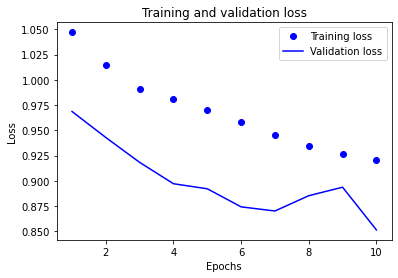

In [15]:
acc = history_dict1['accuracy']
val_acc = history_dict1['val_accuracy']
loss = history_dict1['loss']
val_loss = history_dict1['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

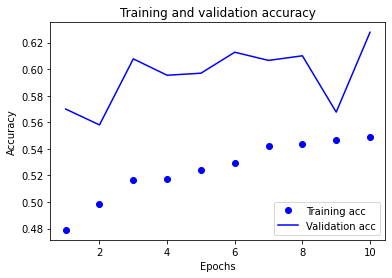

In [16]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

The Dots represent the epochs of the trainig data and the line is validation data.

For the losses, In both training and validation loss, the data was decreasing but at 7th epoch, the validation loss started to increase. At 9th epoch, it got really increased and after that it become very low.
On the other hand, training loss gradually decrease without any rapid changes.

In the Training accuracy , it usually increased but got decreased on epoch 4,8. IN the case of validation data, itstarted rising but after 3rd epoch, it got decreasing and on 9th epoch, it got a drastic downfall. This thing occured for overfitting.

Reference for Plot making: https://www.tensorflow.org/tutorials/keras/text_classification

## Prediction test on Public image Set

In [17]:
arr_predict=model.predict(images_test_public)

75/75 [==============================] - 0s 5ms/step


In [18]:
arr_predict

array([[0.26721686, 0.29717386, 0.43560928],
       [0.17600946, 0.43072158, 0.3932689 ],
       [0.2563355 , 0.32598713, 0.4176773 ],
       ...,
       [0.4823626 , 0.4120184 , 0.10561901],
       [0.21234229, 0.6210556 , 0.16660212],
       [0.33179697, 0.5159577 , 0.15224533]], dtype=float32)

In [19]:
len(arr_predict)

2374

Need to predict the highest age by the predict array. Here tried to put this prediction in a dataframe so that it can easily be tranfer into .csv file.

In [20]:
import numpy as np
import pandas as pd
i=0
datafram=[]
for i in range(len(arr_predict)):
   val2=np.argmax(arr_predict[i])
   print(val2)
   datafram.append(val2)
   i=i+1
      

2
1
2
2
2
2
1
1
1
2
2
1
2
2
2
0
2
2
2
2
2
2
2
1
2
2
2
2
1
2
2
2
1
2
2
2
2
2
2
2
2
2
1
2
1
2
1
1
1
2
2
1
2
2
2
2
2
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
1
2
1
2
1
2
2
1
2
2
1
2
1
1
2
1
1
2
2
1
1
1
0
2
2
1
1
1
0
1
2
2
1
1
1
2
0
2
2
2
0
0
1
2
1
1
1
1
1
0
1
1
2
2
2
0
1
1
1
0
0
0
1
1
1
1
1
2
2
1
0
1
1
1
1
1
1
1
2
2
2
0
1
1
1
2
1
1
0
1
1
1
2
1
0
2
1
2
1
1
1
1
2
1
1
2
2
1
1
2
2
1
2
2
2
2
2
2
1
1
1
1
1
1
1
1
0
2
2
2
1
1
0
1
1
1
1
1
1
1
2
2
1
1
1
1
2
2
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
2
2
1
1
1
1
1
1
2
2
2
1
2
2
2
1
0
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
0
1
1
2
1
0
0
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
2
2
1
0
1
1
0
1
1
1
1
0
1
1
0
1
2
0
1
0
1
1
0
1
1
0
0
1
1
1
1
1
1
1
1
0
1
1
0
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
0
1
1
2
2
0
1
0
2
1
1
1
0
0
0
1
1
1
0
1
1
1
1
0
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
2
1
0
1
0
1
1
1
1
0
0
1
1
0
0
1
1
1
0
2
2
2
1
2
2
1
1
1
1
1
2
0
1
0
1
2
2
1
1
1
1
1
2
1
1
0
1
0
2
0
0
0
0
0
1
0
0
1
0
1
1
1
1
1
0
1
1
0
1
0
0
0
1
1


In [21]:
# datafram

In [22]:
pd.DataFrame(datafram).to_csv('sample.csv', index_label = ["ID","Prediction"])    

In [24]:
# test purpose
i=0
for i in range(len(arr_predict)):
  max_index = np.max(arr_predict[i])
  print(max_index)
  i=i+1

0.43560928
0.43072158
0.4176773
0.55057937
0.61239165
0.57206017
0.40039125
0.4251883
0.3764241
0.56352484
0.5183994
0.5189636
0.5216492
0.5596018
0.8989554
0.3825123
0.62406343
0.5323128
0.91321325
0.93438137
0.74872106
0.6860396
0.9658452
0.79582334
0.9577665
0.9086721
0.5757571
0.60851973
0.3945774
0.7854911
0.65906525
0.7338406
0.44178736
0.38839895
0.56596065
0.56348765
0.8544861
0.8719024
0.6767032
0.6357242
0.5165039
0.46774834
0.35404173
0.70836127
0.7350538
0.69331706
0.4834646
0.6589929
0.39889672
0.96459275
0.90052176
0.5290535
0.487772
0.47709844
0.5399379
0.89239967
0.86069167
0.39203718
0.5482022
0.47070348
0.50047404
0.64462775
0.76290816
0.83422756
0.6825716
0.8381382
0.9390826
0.60261333
0.4754158
0.82641596
0.5221302
0.6167615
0.42647716
0.7747731
0.4587638
0.650849
0.46956405
0.5264958
0.45847967
0.6003047
0.6641988
0.486667
0.38339174
0.9702078
0.4644606
0.55439174
0.4713601
0.35090816
0.42445305
0.84917176
0.79918265
0.50973654
0.42728132
0.52050513
0.3908884
0.662

### Reference for the basic Cnn model 
Reference: https://www.tensorflow.org/tutorials/images/classification

# HOG Features with CNN

Import needed Library

In [ ]:
from skimage.feature import hog
from skimage import exposure

Hog feature usuage

In [25]:
fd, hog_image = hog(images_train[0], orientations=15, pixels_per_cell=(20, 20),
                    cells_per_block=(2, 2), visualize=True, block_norm="L1", transform_sqrt=False)

### HOG Train data

In [26]:
hog_train=[]
for img in images_train:
  fd, hog_image = hog(img, orientations=15, pixels_per_cell=(20, 20),
  cells_per_block=(2, 2), visualize=True, block_norm="L1", transform_sqrt=False)
  hog_train.append(hog_image)

In [27]:
img=np.array(hog_image)

In [28]:
img.shape

(100, 100)

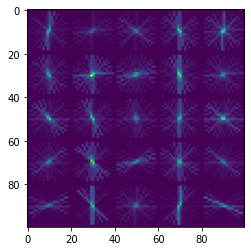

In [29]:
from matplotlib import pyplot as plt
plt.imshow(img)

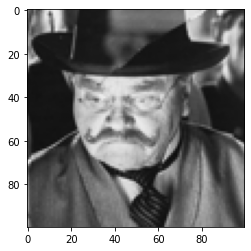

In [30]:
plt.imshow(images_train[0])

### HOG Validation of data

In [31]:
fd, hog_image = hog(images_val[0], orientations=15, pixels_per_cell=(20, 20),
                    cells_per_block=(2, 2), visualize=True, block_norm="L1", transform_sqrt=False)

In [32]:
hog_val=[]
for img in images_val:
  fd, hog_image = hog(img, orientations=15, pixels_per_cell=(20, 20),
  cells_per_block=(2, 2), visualize=True, block_norm="L1", transform_sqrt=False)
  hog_val.append(hog_image)

In [33]:
img=np.array(hog_image)

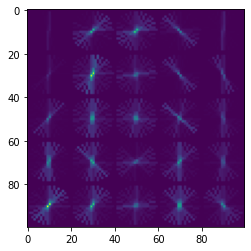

In [34]:
from matplotlib import pyplot as plt
plt.imshow(img)

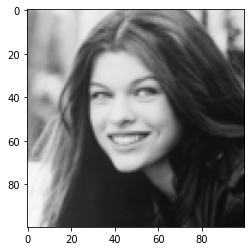

In [35]:
plt.imshow(images_val[0])

### HOG Test Pubic data

In [36]:
fd, hog_image = hog(images_test_public[0], orientations=15, pixels_per_cell=(20, 20),
                    cells_per_block=(2, 2), visualize=True, block_norm="L1", transform_sqrt=False)

In [37]:
hog_test=[]
for img in images_test_public:
  fd, hog_image = hog(img, orientations=15, pixels_per_cell=(20, 20),
  cells_per_block=(2, 2), visualize=True, block_norm="L1", transform_sqrt=False)
  hog_test.append(hog_image)

In [38]:
img=np.array(hog_image)

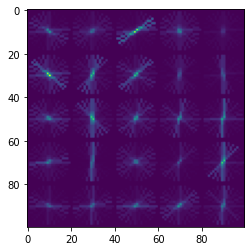

In [39]:
from matplotlib import pyplot as plt
plt.imshow(img)

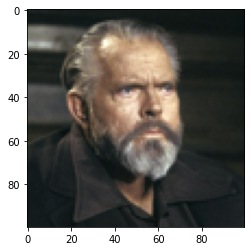

In [40]:
plt.imshow(images_test_public[1])

In [41]:
hog_train=np.array(hog_train)
hog_test=np.array(hog_test)
hog_val=np.array(hog_val)

In [42]:
image_size=100
hog_train = hog_train.reshape([-1, image_size, image_size, 1])
hog_val = hog_val.reshape([-1, image_size, image_size, 1]) 
hog_test = hog_test.reshape([-1, image_size, image_size, 1]) 

### Model Creation with HOG Features

Used the same model of Cnn that used before.

In [43]:
model_hog = Sequential([
  #layers.RandomFlip("horizontal_and_vertical"),
  #layers.Resizing(180, 180),
  #layers.Rescaling(1./255, input_shape=(100, 100, 3)),
  layers.Conv2D(16, 3, padding='valid', activation='relu', input_shape=(100, 100, 1)),
  layers.MaxPooling2D(),
  #data_augmentation,  ##
  layers.Conv2D(16, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  #layers.RandomRotation(0.2),
  layers.Conv2D(64, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Normalization(), ###
  layers.Flatten(),
  layers.Dense(512, activation='relu'), #
  layers.Dropout(0.5), ##
  layers.Dense(3, activation="softmax") ###
 # layers.Activation("softmax")
])

In [44]:
model_hog.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [45]:
model_hog.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 21, 21, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 10, 10, 32)      

In [46]:
hog_history = model_hog.fit(hog_train, labels_train, epochs=10,
validation_data=(hog_val, labels_val))

Epoch 1/10
422/422 [==============================] - 5s 9ms/step - loss: 1.0599 - accuracy: 0.4738 - val_loss: 1.0031 - val_accuracy: 0.5699
Epoch 2/10
422/422 [==============================] - 3s 8ms/step - loss: 1.0580 - accuracy: 0.4743 - val_loss: 0.9970 - val_accuracy: 0.5699
Epoch 3/10
422/422 [==============================] - 3s 8ms/step - loss: 1.0565 - accuracy: 0.4743 - val_loss: 0.9981 - val_accuracy: 0.5699
Epoch 4/10
422/422 [==============================] - 3s 8ms/step - loss: 1.0568 - accuracy: 0.4743 - val_loss: 1.0047 - val_accuracy: 0.5699
Epoch 5/10
422/422 [==============================] - 3s 8ms/step - loss: 1.0565 - accuracy: 0.4743 - val_loss: 0.9972 - val_accuracy: 0.5699
Epoch 6/10
422/422 [==============================] - 3s 8ms/step - loss: 1.0569 - accuracy: 0.4742 - val_loss: 0.9949 - val_accuracy: 0.5699
Epoch 7/10
422/422 [==============================] - 3s 7ms/step - loss: 1.0564 - accuracy: 0.4741 - val_loss: 1.0070 - val_accuracy: 0.5699
Epoch 

### Evaluate the model

In [47]:
history_dict = hog_history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

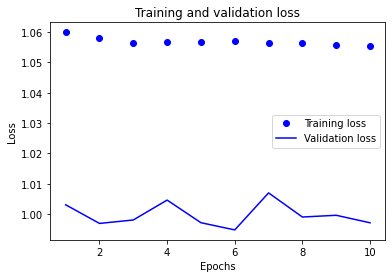

In [48]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

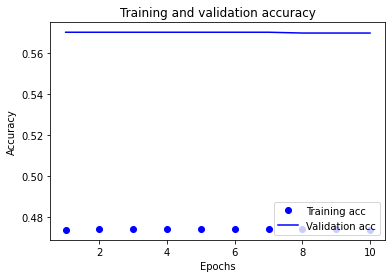

In [49]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

As the Training and Validation accuracy are totally flat and didn't effect, they are not an effetive model for good accuarcy. The Losses of  validation loss and trainig loss are different and training loss were decreasing, got increased at epoch 4. Validation loss almost creation a unpredictable non-sequenced approach.

In [50]:
arr_predict_hog=model.predict(images_test_public)

75/75 [==============================] - 0s 3ms/step


### CSV Conversion of the Prediction

In [51]:
import numpy as np
import pandas as pd
i=0
datafram_hog=[]
for i in range(len(arr_predict_hog)):
   val2=np.argmax(arr_predict_hog[i])
   #print(val2)
   datafram_hog.append(val2)
   i=i+1

In [52]:
pd.DataFrame(datafram_hog).to_csv('sample_hog.csv', index_label = ["ID","Prediction"])    

The performance of hog is quite lower than the previous Cnn model, which is .42207

# SVM Model (Conv ML) on Public Dataset

For the Conv ML, RFD, KNN and SVM model have been tried on this Public Dataset, but among them SVM is performed best and given the highest accuracy of the models.
Here the Best model's performence is shown:

**Data Train**

In [4]:
image_train_svm=images_train[:2000]
label_train_svm=labels_train[:2000]

Have Taken less data (2000) from the public dataset for training.

In [5]:
len_t=len(image_train_svm)
image_train_svm=image_train_svm.reshape(len_t,-1)

**SVM implementation on Public Dataset**

In [6]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(image_train_svm, label_train_svm) 

SVC(kernel='linear')

###Evaluate the model

In [7]:
len_t=len(images_val)
image_val_svm=images_val.reshape(len_t,-1)
y2=clf.predict(image_val_svm)

**Accuracy of Public Dataset on SVM Model**

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(labels_val,y2) 

0.4605009633911368

# Comparison of the best resulted Models of Conv ML and Deeplearning on Public dataset

For the Conv ML Model on Public dataset : SVM ; The Public data accuracy is 46%.
For the Deep learning Model on Public dataset :CNN ; The Public Data best accuracy is 54.21% among my all attempts in Kaggle platform.

# On Private Dataset( Running Best Implemented Model: CNN Model: )

In [4]:
image_size = 100
#dataset_directory = '/content/Mydrive/MyDrive/Colab Notebooks/ML_Project_code/'  # change to your own directory
dataset_directory = '/content/Mydrive/MyDrive/ML_Project_code/data'
age_ranges = {
    (6,20) : 0, 
    (35,40) : 1, 
    (55,98) : 2
}

def convert_ranges(age):
  for key in age_ranges:
    if key[0] <= age <= key[1]:
      return age_ranges[key]


def transform_labels_age(labels_vec):
  new_labels_vec = []
  for x in labels_vec:
    x2 = x.split('-')
    new_labels_vec.append(convert_ranges(int(x2[1])))
  return np.array(new_labels_vec)

def transform_labels(labels_vec):
  return transform_labels_age(labels_vec)


In [5]:
images_train = np.load(join(dataset_directory, 'train_images.npy'))
labels_train_full = np.load(join(dataset_directory, 'train_labels.npy'))
labels_train = transform_labels(labels_train_full)

images_val = np.load(join(dataset_directory, 'val_images.npy'))
labels_val_full = np.load(join(dataset_directory, 'val_labels.npy'))
labels_val = transform_labels(labels_val_full)

images_test_priv = np.load(join(dataset_directory, 'test_priv_images.npy'))

images_train = images_train.reshape([-1, image_size, image_size, 3]) / 255.0
images_val = images_val.reshape([-1, image_size, image_size, 3]) / 255.0
images_test_priv = images_test_priv.reshape([-1, image_size, image_size, 3]) / 255.0

print(images_train.shape)
print(images_val.shape)
print(images_test_priv.shape)

print(labels_val_full[:9])
print(labels_val[:9])


(13475, 100, 100, 3)
(2595, 100, 100, 3)
(2122, 100, 100, 3)
['12626-16' '12726-37' '12726-37' '12726-37' '12726-37' '12726-37'
 '12726-37' '12726-39' '12726-37']
[0 1 1 1 1 1 1 1 1]


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip(mode="horizontal", seed=42),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1), 
])

In [10]:


model_priv = Sequential([
  #layers.RandomFlip("horizontal_and_vertical"),
  #layers.Resizing(180, 180),
  #layers.Rescaling(1./255, input_shape=(100, 100, 3)),
  layers.Conv2D(16, 3, padding='valid', activation='relu', input_shape=(100, 100, 3)),
  layers.MaxPooling2D(),
  data_augmentation,  ##
  layers.Conv2D(16, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  #layers.RandomRotation(0.2),
  layers.Conv2D(64, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Normalization(), ###
  layers.Flatten(),
  layers.Dense(512, activation='relu'), #
  layers.Dropout(0.5), ##
  layers.Dense(3, activation="softmax") ###
 # layers.Activation("softmax")
])

In [11]:
model_priv.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model_priv.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 sequential (Sequential)     (None, 49, 49, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 21, 21, 32)       

In [13]:
history_priv = model_priv.fit(images_train, labels_train, epochs=10,
validation_data=(images_val, labels_val))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


422/422 [==============================] - 28s 39ms/step - loss: 1.0471 - accuracy: 0.4775 - val_loss: 0.9570 - val_accuracy: 0.5572
Epoch 2/10
422/422 [==============================] - 16s 37ms/step - loss: 1.0048 - accuracy: 0.5057 - val_loss: 0.9062 - val_accuracy: 0.5900
Epoch 3/10
422/422 [==============================] - 15s 36ms/step - loss: 0.9846 - accuracy: 0.5144 - val_loss: 0.9117 - val_accuracy: 0.5996
Epoch 4/10
422/422 [==============================] - 17s 41ms/step - loss: 0.9713 - accuracy: 0.5241 - val_loss: 0.9252 - val_accuracy: 0.5865
Epoch 5/10
422/422 [==============================] - 16s 37ms/step - loss: 0.9583 - accuracy: 0.5299 - val_loss: 0.8831 - val_accuracy: 0.6054
Epoch 6/10
422/422 [==============================] - 15s 37ms/step - loss: 0.9475 - accuracy: 0.5348 - val_loss: 0.8848 - val_accuracy: 0.6058
Epoch 7/10
422/422 [==============================] - 16s 37ms/step - loss: 0.9407 - accuracy: 0.5396 - val_loss: 0.8839 - val_accuracy: 0.5911
Epo

In [14]:
history_dict2 = history_priv.history
history_dict2.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Model Evaluation

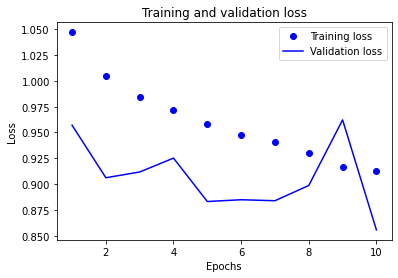

In [15]:
acc = history_dict2['accuracy']
val_acc = history_dict2['val_accuracy']
loss = history_dict2['loss']
val_loss = history_dict2['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

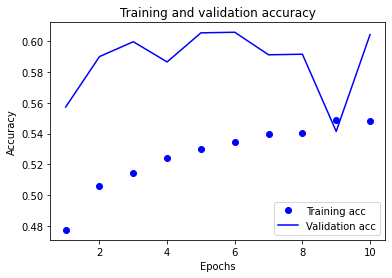

In [16]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In Private dataset, this model (CNN), worked in a better way than public dataset. 
In compare to the measurement of the epoch from the trainig and validation loss and accuracy, the overall performance is relected a good result.

In [18]:
arr_predict_priv=model_priv.predict(images_test_priv)

67/67 [==============================] - 0s 5ms/step


### CSV Conversion of the Prediction

In [19]:
import numpy as np
import pandas as pd
i=0
datafram_priv=[]
for i in range(len(arr_predict_priv)):
   val2=np.argmax(arr_predict_priv[i])
   #print(val2)
   datafram_priv.append(val2)
   i=i+1

In [20]:
pd.DataFrame(datafram_priv).to_csv('sample_priv.csv', index_label = ["ID","Prediction"])    

The best implemented model gave the accuracy 63.713% on private dataset, which is an improvement of the public dataset accuracy. 